## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [1]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath_1 = 'datasets/lego_sets.csv'
filepath_2 = 'datasets/parent_themes.csv'
lego = pd.read_csv(filepath_1)
parent = pd.read_csv(filepath_2)
lego.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [2]:
parent.head(20)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


In [3]:
print(lego.shape)
print(parent.shape)

(11986, 6)
(111, 3)


In [4]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


In [5]:
lego.dropna(subset=["set_num"], inplace=True)
lego['num_parts'].fillna(method='ffill', inplace=True)
lego.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11833 entries, 0 to 11832
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11833 non-null  int64  
 3   num_parts     11833 non-null  float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11833 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 647.1+ KB


In [6]:
len(lego['parent_theme'].unique())

109

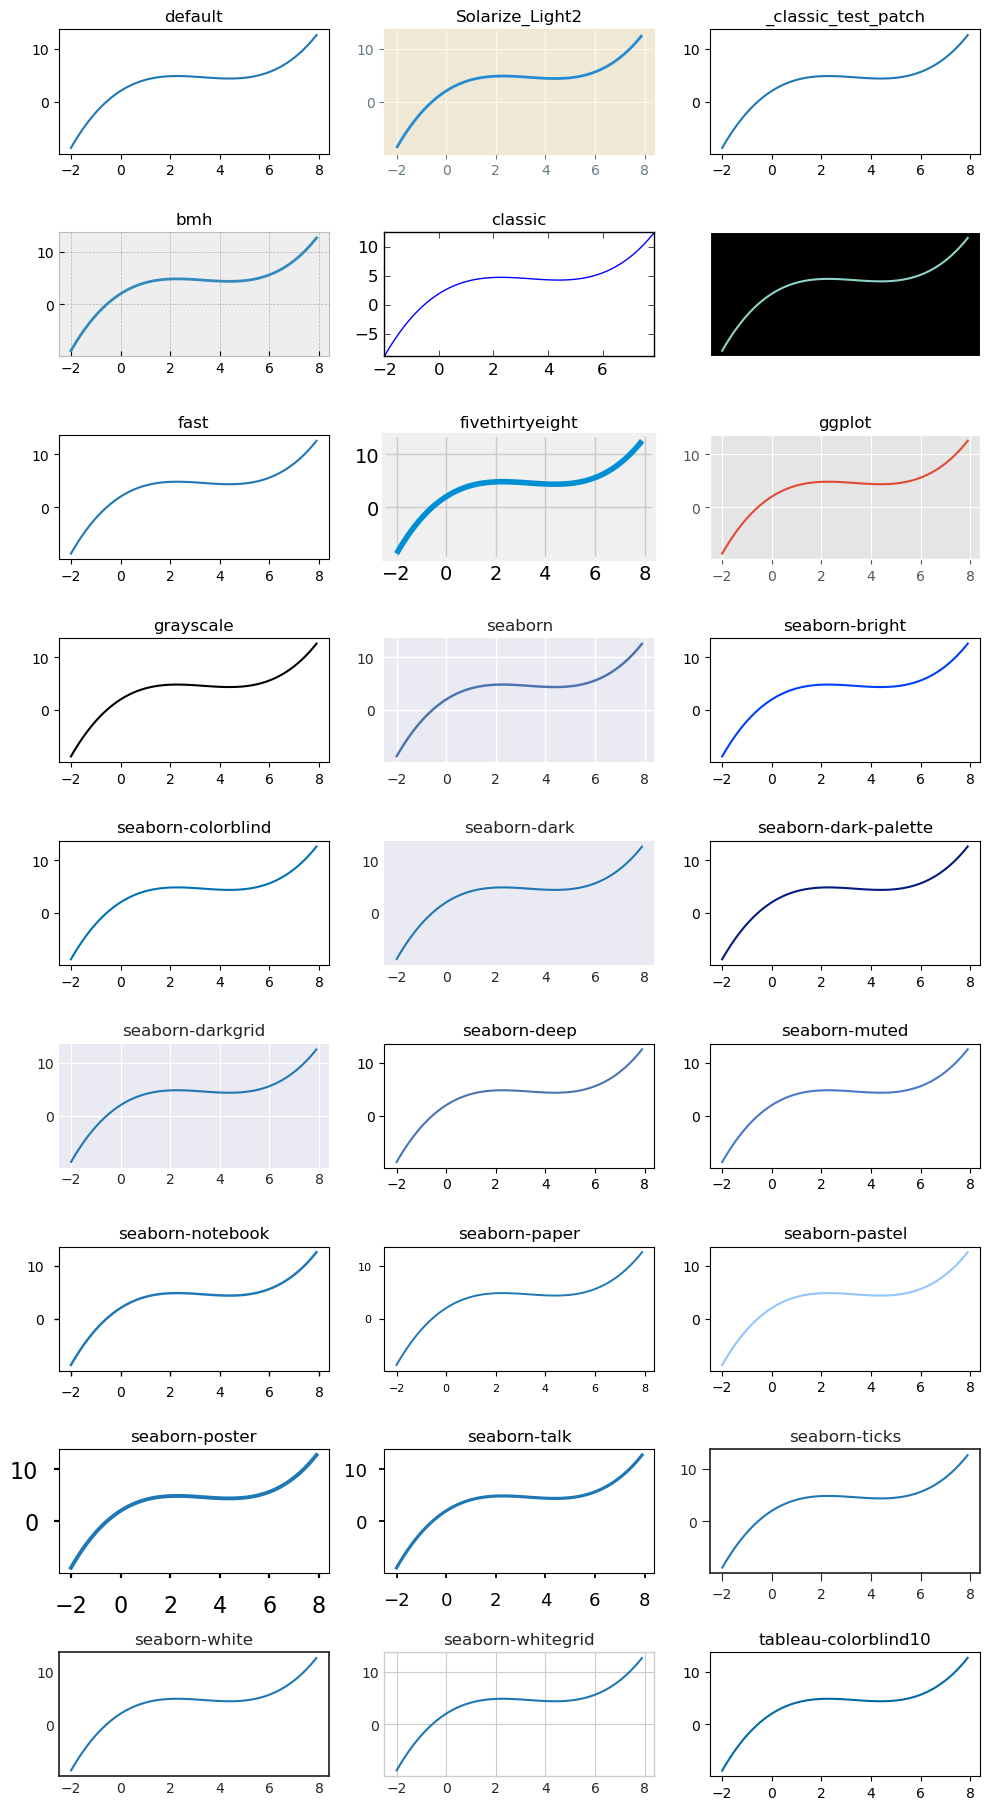

In [7]:
x = np.arange(-2, 8, .1)
y = .1 * x ** 3 - x ** 2 + 3 * x + 2

fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)

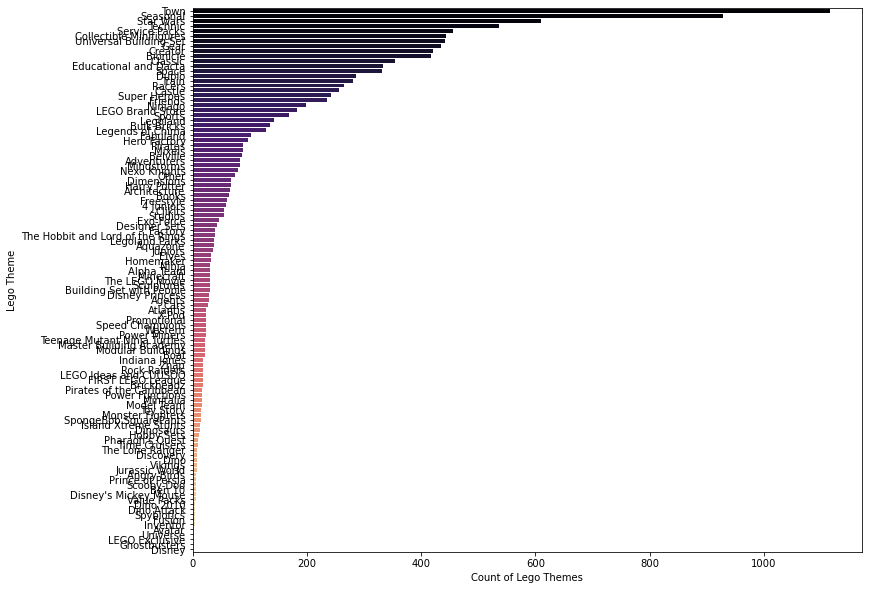

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
plt.style.use('ggplot')
parent_themes = lego['parent_theme'].value_counts()
sns.barplot(x=parent_themes.values, y=parent_themes.index, palette='magma')
plt.xlabel("Count of Lego Themes")
plt.ylabel("Lego Theme")
plt.show()

In [9]:
parent = parent.rename(columns = {'name':'parent_theme'})
lego_themes = lego.merge(parent, on='parent_theme')
lego_themes

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,12.0,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,12.0,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,3.0,Building,Legoland,411,False
...,...,...,...,...,...,...,...,...
11828,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11829,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11830,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11831,8518-1,Jet Ray,2010,14.0,Ben 10,Ben 10,270,True


In [10]:
lego_themes = lego_themes[lego_themes['is_licensed'] == True]
lego_themes = lego_themes.reset_index().drop('index', axis=1)
lego_themes

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
1,10019-1,Rebel Blockade Runner - UCS,2001,1868.0,Star Wars Episode 4/5/6,Star Wars,158,True
2,10026-1,Naboo Starfighter - UCS,2002,669.0,Star Wars Episode 1,Star Wars,158,True
3,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
4,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
1174,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
1175,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
1176,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
1177,8518-1,Jet Ray,2010,14.0,Ben 10,Ben 10,270,True


In [11]:
star_wars = lego_themes[lego_themes['parent_theme'] == 'Star Wars']
rest_themes = lego_themes[lego_themes['parent_theme'] != 'Star Wars']

print(len(lego_themes))
print(len(star_wars))
print(len(rest_themes))

1179
609
570


In [12]:
the_force = int((len(star_wars)/len(lego_themes)) * 100)
print(the_force)

51


In [13]:
eras = star_wars.groupby('year')['set_num'].agg(['count'])

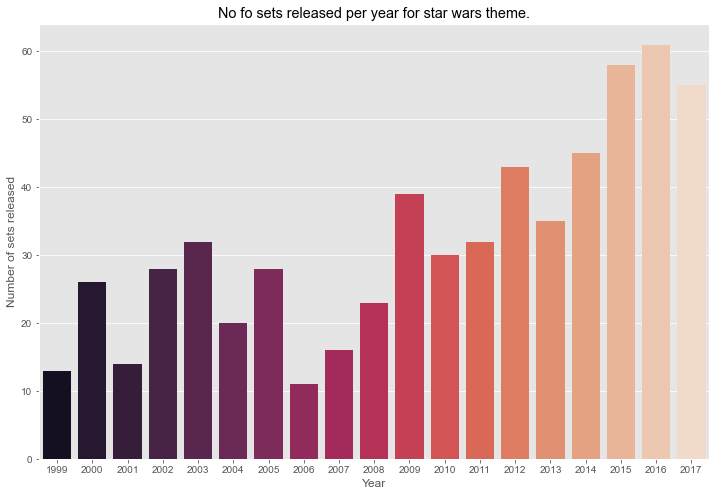

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('seaborn-darkgrid')
sns.barplot(x=eras.index, y=eras['count'], palette='rocket')
plt.xlabel("Year")
plt.ylabel("Number of sets released")
plt.title("No fo sets released per year for star wars theme.")
plt.show()

In [15]:
new_era = eras.index.min()

# In Which year star wars was not the most popular theme
new_era

1999